# Load the dataset, preprocess it and create DataLoaders

In [1]:
import torch
import numpy as np
# set seeds
torch.seed = 42
np.random.seed(42)

In [2]:
# load dataset from pickle file
import pandas as pd

df = pd.read_pickle("SafetyPointGoal1Dataset0.pkl")

In [3]:
df.describe()

,accelerometer0,accelerometer1,accelerometer2,velocimeter0,velocimeter1,velocimeter2,gyro0,gyro1,gyro2,magnetometer0,...,vases_lidar9,vases_lidar10,vases_lidar11,vases_lidar12,vases_lidar13,vases_lidar14,vases_lidar15,action0,action1,exp_cost
count,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.0,100000.0,100000.0,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.069010,-0.001533,9.810000e+00,0.023808,0.001872,0.0,0.0,0.0,0.006035,-0.000537,...,0.053299,0.053256,0.053404,0.053087,0.052577,0.053171,0.053593,0.000356,0.003248,9.916320
std,1.926543,6.733668,1.500540e-15,0.718428,0.577444,0.0,0.0,0.0,2.374169,0.352747,...,0.152026,0.151757,0.151848,0.151066,0.150142,0.151592,0.153017,1.072705,1.115400,19.740233
min,-5.452849,-19.989003,9.810000e+00,-1.499778,-1.081251,0.0,0.0,0.0,-3.038259,-0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.609840,-4.453977,0.000000
25%,-1.879547,-1.475206,9.810000e+00,-0.453180,-0.639035,0.0,0.0,0.0,-2.815359,-0.351950,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.686058,-0.902644,0.000000
50%,0.023382,-0.015324,9.810000e+00,0.020276,0.002603,0.0,0.0,0.0,0.020454,-0.001902,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006072,0.003101,0.000000
75%,2.059706,1.469249,9.810000e+00,0.504858,0.639037,0.0,0.0,0.0,2.808083,0.352273,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.680545,0.902431,15.000000
max,5.351211,19.983345,9.810000e+00,1.499773,1.053874,0.0,0.0,0.0,3.039440,0.500000,...,0.933722,0.933531,0.933638,0.933393,0.932465,0.922693,0.917074,7.266669,4.720612,200.000000


In [4]:
# Seperate the dataset into data and label again
# remove third velocimeter and accelerometer and magnetometer columns as they are for the z-axis and therefore irrelevant
# also remove gyro0 and gyro1 as there is no rotation possible on the x and y axis
X = df.drop(columns=["exp_cost", "velocimeter2", "accelerometer2", "magnetometer2", "gyro0", "gyro1"])
y = df.exp_cost

(array([7.8766e+04, 1.3124e+04, 4.7600e+03, 1.8520e+03, 8.0200e+02,
        3.7800e+02, 1.8800e+02, 8.2000e+01, 3.6000e+01, 1.2000e+01]),
 array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180., 200.]),
 <BarContainer object of 10 artists>)

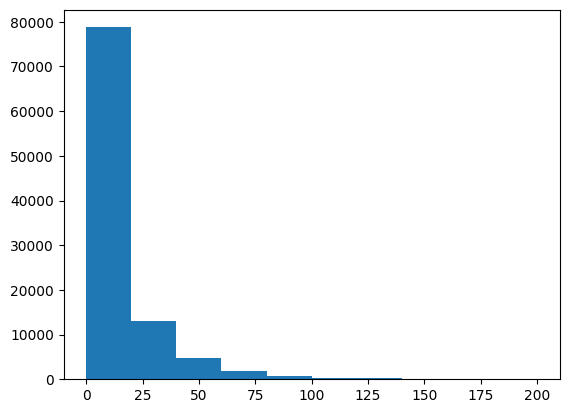

In [5]:
import matplotlib.pyplot as plt

plt.hist(y)

In [6]:
obs_column_names = ['accelerometer0', 'accelerometer1', 'velocimeter0', 'velocimeter1', 'gyro2', 'magnetometer0', 'magnetometer1']
for key in ['goal_lidar', 'hazards_lidar', 'vases_lidar']:
    for i in range(16):
        obs_column_names.append(key+str(i))
obs_column_names.append("action0")
obs_column_names.append("action1")
len(obs_column_names)

57

In [7]:
# Scaling the data with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled = scaler.fit_transform(X)
scaled_X = pd.DataFrame(scaled, columns=obs_column_names)
scaled_X.head()

,accelerometer0,accelerometer1,velocimeter0,velocimeter1,gyro2,magnetometer0,magnetometer1,goal_lidar0,goal_lidar1,goal_lidar2,...,vases_lidar8,vases_lidar9,vases_lidar10,vases_lidar11,vases_lidar12,vases_lidar13,vases_lidar14,vases_lidar15,action0,action1
0,0.433478,0.788590,0.133874,0.776725,0.582009,0.029088,0.668053,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.338574,0.490314
1,0.339722,0.460362,0.338908,0.892061,0.998717,0.041138,0.698610,0.0,0.0,0.0,...,0.492113,0.629606,0.137120,0.0,0.0,0.0,0.0,0.0,0.424049,0.655643
2,0.704106,0.535025,0.656853,0.166961,0.988933,0.333022,0.971294,0.0,0.0,0.0,...,0.210128,0.780801,0.570618,0.0,0.0,0.0,0.0,0.0,0.514721,0.687201
3,0.712390,0.469264,0.641438,0.805581,0.010329,0.980087,0.360298,0.0,0.0,0.0,...,0.666369,0.682326,0.015416,0.0,0.0,0.0,0.0,0.0,0.442407,0.292759
4,0.518254,0.217423,0.975002,0.368165,0.454788,0.296595,0.043244,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.483764,0.500775


In [8]:
scaled_X.describe()

,accelerometer0,accelerometer1,velocimeter0,velocimeter1,gyro2,magnetometer0,magnetometer1,goal_lidar0,goal_lidar1,goal_lidar2,...,vases_lidar8,vases_lidar9,vases_lidar10,vases_lidar11,vases_lidar12,vases_lidar13,vases_lidar14,vases_lidar15,action0,action1
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.511091,0.500032,0.507938,0.507288,0.500896,0.499463,0.500887,0.056146,0.056738,0.056568,...,0.056717,0.057083,0.057048,0.057200,0.056875,0.056385,0.057626,0.058439,0.435692,0.485823
std,0.178317,0.168458,0.239512,0.270450,0.390636,0.352747,0.354360,0.158660,0.160283,0.160234,...,0.161911,0.162817,0.162562,0.162641,0.161846,0.161016,0.164293,0.166853,0.083307,0.121575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.330737,0.463165,0.348918,0.207115,0.036675,0.148050,0.146654,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.382385,0.387084
50%,0.506868,0.499687,0.506761,0.507630,0.503268,0.498098,0.501473,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.436136,0.485807
75%,0.695346,0.536827,0.668312,0.805708,0.961934,0.852273,0.856394,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.488516,0.583831
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
y_class = (y != 0).astype(np.float32)

In [10]:
y_class.describe()

count    100000.00000
mean          0.31276
std           0.46362
min           0.00000
25%           0.00000
50%           0.00000
75%           1.00000
max           1.00000
Name: exp_cost, dtype: float64

In [11]:
# Divide data into train, test and validation set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_X.to_numpy(), y.to_numpy(), test_size=0.2)
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.2)

In [13]:
X_train.shape

(64000, 57)

In [14]:
X_validate.shape

(16000, 57)

In [15]:
X_test.shape

(20000, 57)

In [12]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using {device} device")

Using cuda device


In [13]:
class SampleDataset(torch.utils.data.Dataset):
    def __init__(self, X, y):
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.x = torch.tensor(X, dtype=torch.float32).to(device)
        self.y = torch.tensor(y, dtype=torch.float32).to(device)
        self.y_class = torch.tensor((y != 0).astype(np.float32), dtype=torch.float32).to(device)

    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        preds = self.x[idx]
        exp_cost = self.y[idx]
        y_class = self.y_class[idx]
        return preds, y_class, exp_cost

In [14]:
train_dataset = SampleDataset(X_train, y_train)
validation_dataset = SampleDataset(X_validate, y_validate)
test_dataset = SampleDataset(X_test, y_test)

In [15]:
from torch.utils.data import DataLoader

# Putting data into dataloaders for PyTorch
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
validation_loader = DataLoader(validation_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

Creating a non-zero dataset (for regression)

In [16]:
nonzero_indices = y != 0
X_nonzero = scaled_X[nonzero_indices]
y_nonzero = y[nonzero_indices]

In [17]:
y_nonzero.describe()

count    31276.000000
mean        31.705845
std         23.560117
min          1.000000
25%         17.000000
50%         25.000000
75%         40.000000
max        200.000000
Name: exp_cost, dtype: float64

In [18]:
# Divide data into train, test and validation set
from sklearn.model_selection import train_test_split
X_nz_train, X_nz_test, y_nz_train, y_nz_test = train_test_split(X_nonzero.to_numpy(), y_nonzero.to_numpy(), test_size=0.2)
X_nz_train, X_nz_validate, y_nz_train, y_nz_validate = train_test_split(X_nz_train, y_nz_train, test_size=0.2)

In [19]:
nz_train_dataset = SampleDataset(X_nz_train, y_nz_train)
nz_validation_dataset = SampleDataset(X_nz_validate, y_nz_validate)
nz_test_dataset = SampleDataset(X_nz_test, y_nz_test)

In [20]:
from torch.utils.data import DataLoader

# Putting data into dataloaders for PyTorch
nz_train_loader = DataLoader(nz_train_dataset, batch_size=32, shuffle=True)
nz_validation_loader = DataLoader(nz_validation_dataset, batch_size=32, shuffle=False)
nz_test_loader = DataLoader(nz_test_dataset, batch_size=32, shuffle=False)

# Building a model 

In [38]:
import torch.nn as nn

class ExpectedCostRegressor(nn.Module):
    def __init__(self):
        super(ExpectedCostRegressor, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(57, 64),
            nn.ReLU(),
            nn.Linear(64,1),
            nn.ReLU()
        )

    def forward(self, x):
        return self.fc(x)

class ExpectedCostClassifier(nn.Module):
    def __init__(self):
        super(ExpectedCostClassifier, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(57, 64),
            nn.ReLU(),
            nn.Linear(64,1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.fc(x)

In [22]:
classifier = ExpectedCostClassifier().to(device)
print(classifier)

ExpectedCostClassifier(
  (fc): Sequential(
    (0): Linear(in_features=57, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=1, bias=True)
    (3): Sigmoid()
  )
)


In [40]:
regressor = ExpectedCostRegressor().to(device)

# Training the classifier

In [26]:
# code from https://docs.pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html
def train(dataloader, model, loss_fn, optimizer, regression=False):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y_class, y_reg) in enumerate(dataloader):
        X, y = X.to(device), y_class.to(device)
        if regression:
            y = y_reg.to(device)
            
        # Compute prediction error
        pred = model(X).squeeze()
        loss = loss_fn(pred, y)
        
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# code adapted to regression problem from original code https://docs.pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html
def test(dataloader, model, loss_fn, regression=False, variance=np.var(y_test)):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss= 0
    pred_label = [[],[]]
    with torch.no_grad():
        for X, y_class, y_reg in dataloader:
            X, y = X.to(device), y_class.to(device)
            if regression:
                y = y_reg.to(device)

            pred = model(X).squeeze()
            test_loss += loss_fn(pred, y).item()
            
            if not regression:
                pred_class = (pred > 0.5).int()
                pred_label[0].extend(pred_class.tolist())
                pred_label[1].extend(y.int().tolist())

    test_loss /= num_batches
    if regression: 
        print(f"Avg loss: {test_loss:>8f}")
        print(f"R^2 Score: {(1-(test_loss/variance)):>8f}\n")
    else:
        cm = confusion_matrix(pred_label[0], pred_label[1])
        tn, fp, fn, tp = cm.ravel()
        print(f"Accuracy: {(tp + tn)/(tp + tn + fp + fn)}")
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Zero", "Non-Zero"])
        disp.plot(cmap=plt.cm.Blues)
        plt.title("Confusion Matrix")
        plt.show()
    return test_loss

Epoch 1
-------------------------------
Accuracy: 0.7776


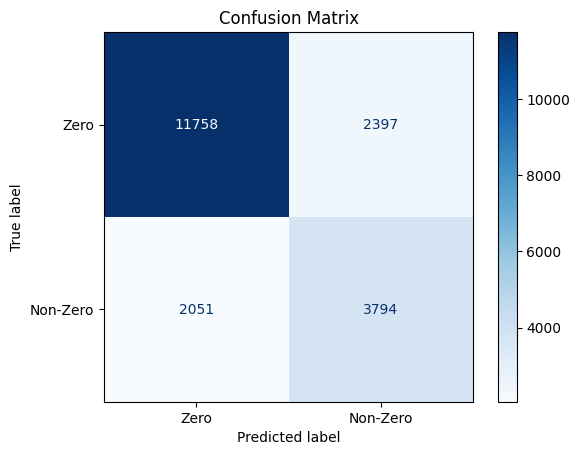

Epoch 2
-------------------------------
Accuracy: 0.78815


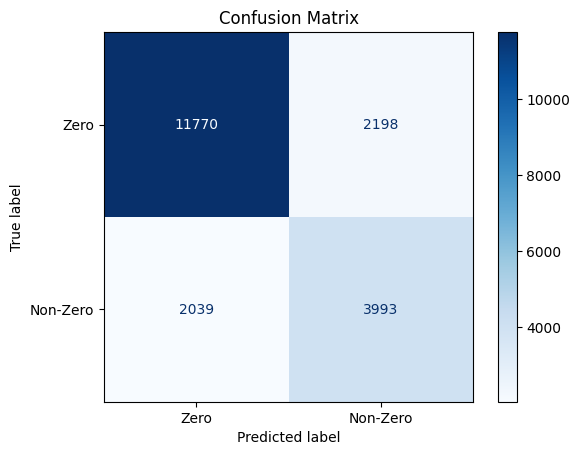

Epoch 3
-------------------------------
Accuracy: 0.7954


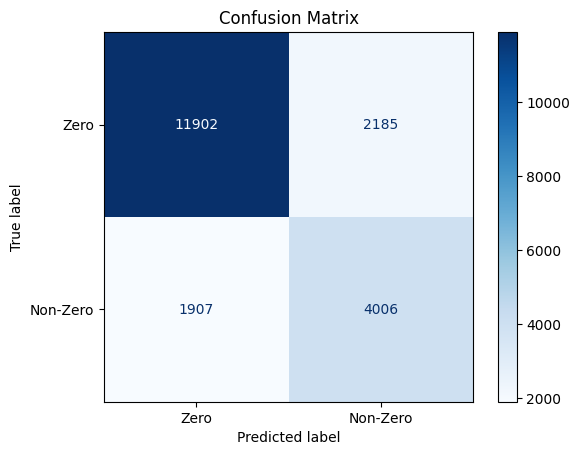

Epoch 4
-------------------------------
Accuracy: 0.7947


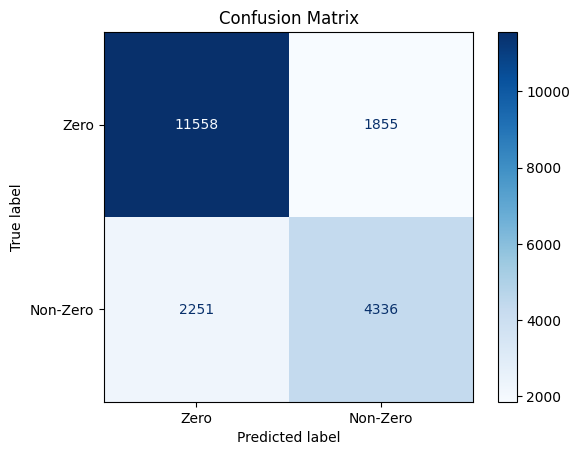

Epoch 5
-------------------------------
Accuracy: 0.79755


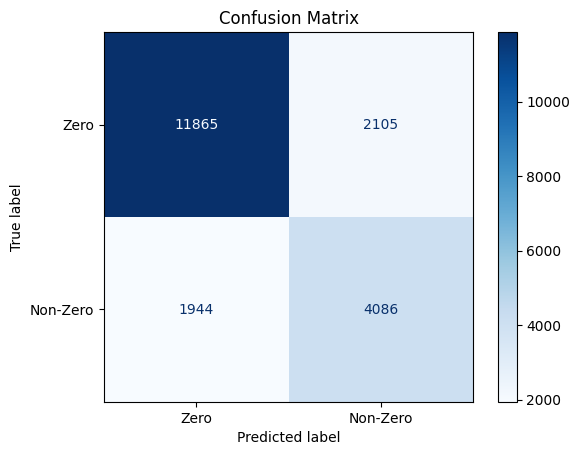

Epoch 6
-------------------------------
Accuracy: 0.79685


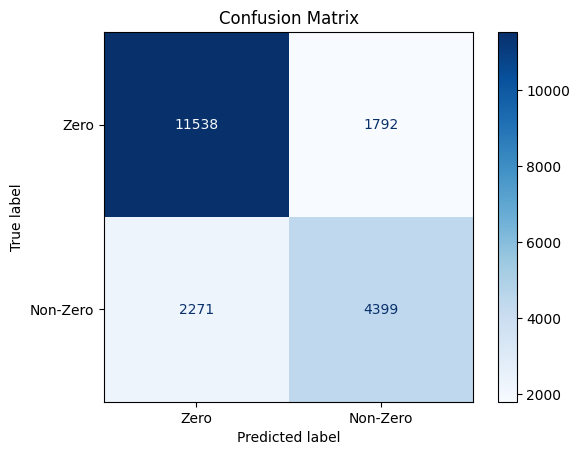

Epoch 7
-------------------------------
Accuracy: 0.8025


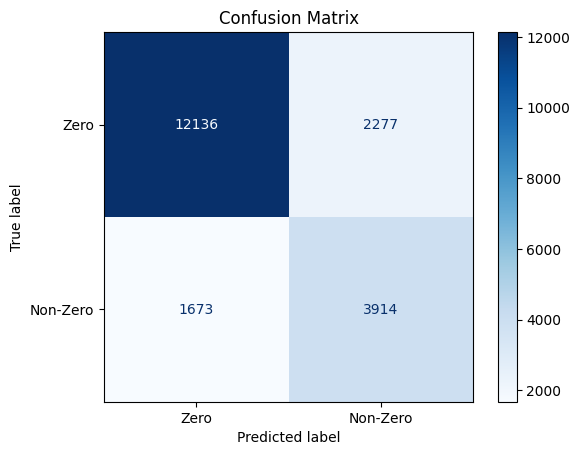

Epoch 8
-------------------------------
Accuracy: 0.8039


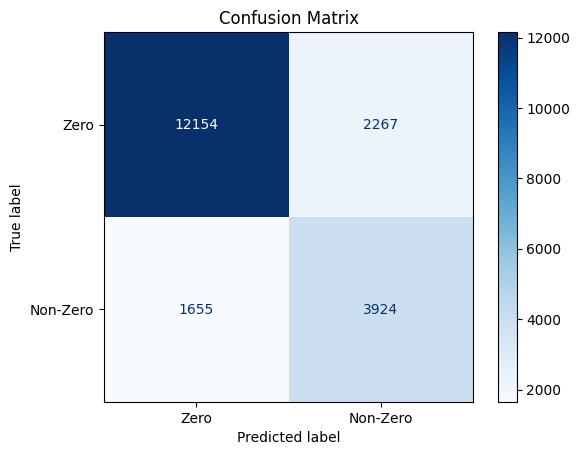

Epoch 9
-------------------------------
Accuracy: 0.80265


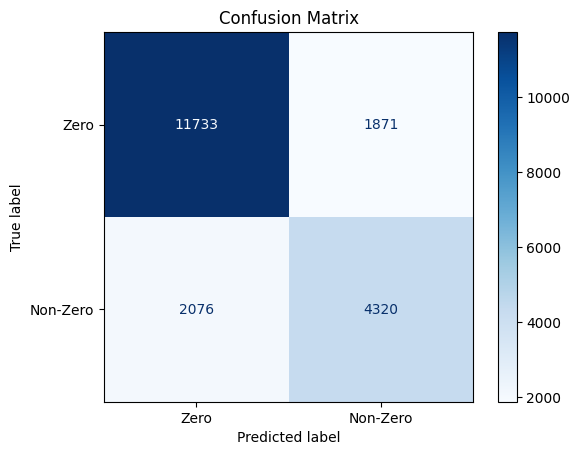

Epoch 10
-------------------------------
Accuracy: 0.8


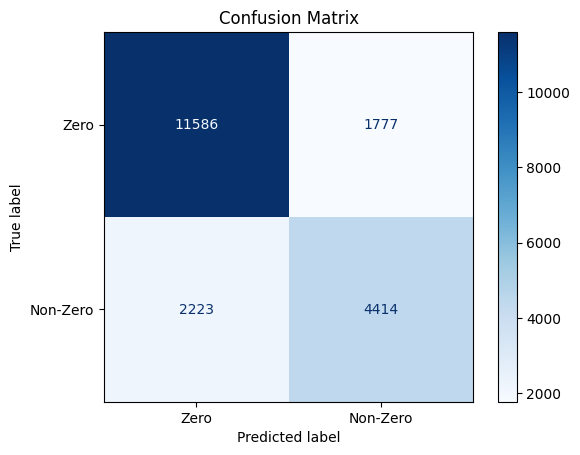

Done!


In [38]:
loss_fn = nn.BCELoss()

optimizer = torch.optim.Adam(classifier.parameters(), lr=1e-3)

# code from https://docs.pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html
epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_loader, classifier, loss_fn, optimizer)
    test(test_loader, classifier, loss_fn)
print("Done!")

In [88]:
# save the model
torch.save(model, "simple_model.pt")

# Train the regressor on the non zero samples

In [39]:
np.var(y_nz_train)

558.1215267569119

In [41]:
loss_fn = nn.MSELoss()

optimizer = torch.optim.Adam(regressor.parameters(), lr=1e-3)

# code from https://docs.pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html
epochs = 50
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(nz_train_loader, regressor, loss_fn, optimizer, True)
    test(nz_test_loader, regressor, loss_fn, True, np.var(y_nz_test))
print("Done!")

Epoch 1
-------------------------------
Avg loss: 545.375673
R^2 Score: -0.007729

Epoch 2
-------------------------------
Avg loss: 542.793454
R^2 Score: -0.002958

Epoch 3
-------------------------------
Avg loss: 539.635529
R^2 Score: 0.002877

Epoch 4
-------------------------------
Avg loss: 537.265461
R^2 Score: 0.007256

Epoch 5
-------------------------------
Avg loss: 535.090032
R^2 Score: 0.011276

Epoch 6
-------------------------------
Avg loss: 534.255704
R^2 Score: 0.012818

Epoch 7
-------------------------------
Avg loss: 531.118868
R^2 Score: 0.018614

Epoch 8
-------------------------------
Avg loss: 529.846701
R^2 Score: 0.020965

Epoch 9
-------------------------------
Avg loss: 528.635021
R^2 Score: 0.023203

Epoch 10
-------------------------------
Avg loss: 526.781118
R^2 Score: 0.026629

Epoch 11
-------------------------------
Avg loss: 525.118390
R^2 Score: 0.029701

Epoch 12
-------------------------------
Avg loss: 525.625661
R^2 Score: 0.028764

Epoch 13
--

# Evaluation of the model / Hyperparameter tuning

exp_cost has a mean of 9.91 and standard deviation of 19.74.
That means an acceptal model should have produce a MSE lower much lower than 390 which is the variance of the data. 

1. Comparing optimizers

SGD:
-------------------------------
Accuracy: 0.7513125


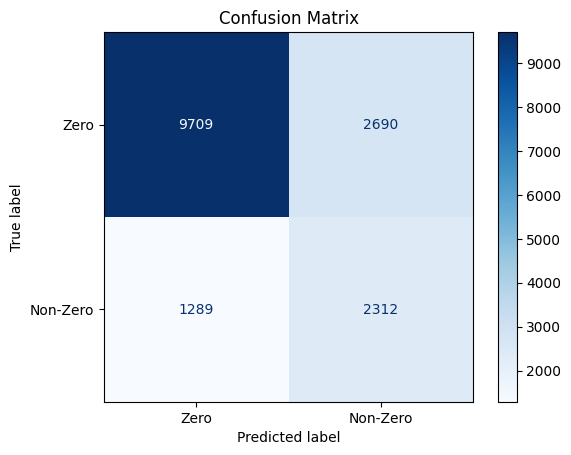

0.48414327716827393

In [39]:
# SGD
classifier_sgd = ExpectedCostClassifier().to(device)
sgd = torch.optim.SGD(classifier_sgd.parameters(), lr=1e-3)
loss_fn = nn.BCELoss()

for _ in range(10):
    train(train_loader, classifier_sgd, loss_fn, sgd)
print("SGD:\n-------------------------------")
test(validation_loader, classifier_sgd, loss_fn)

RMSProp:
-------------------------------
Accuracy: 0.8031875


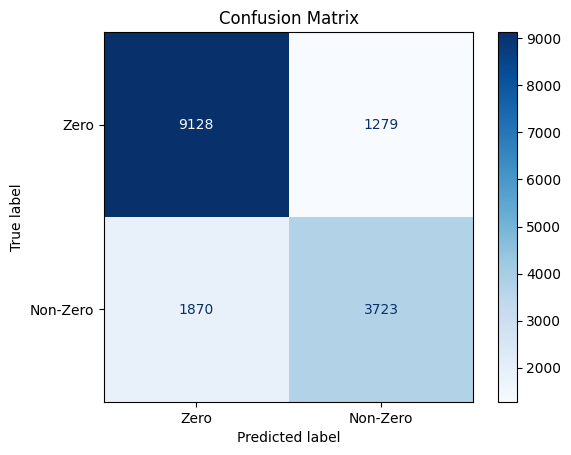

0.39867785581946374

In [40]:
# RMSProp
classifier_rms = ExpectedCostClassifier().to(device)
rms = torch.optim.RMSprop(classifier_rms.parameters(), lr=1e-3)
loss_fn = nn.BCELoss()
for _ in range(10):
    train(train_loader, classifier_rms, loss_fn, rms)
print("RMSProp:\n-------------------------------")
test(validation_loader, classifier_rms, loss_fn)

Adam:
-------------------------------
Accuracy: 0.805625


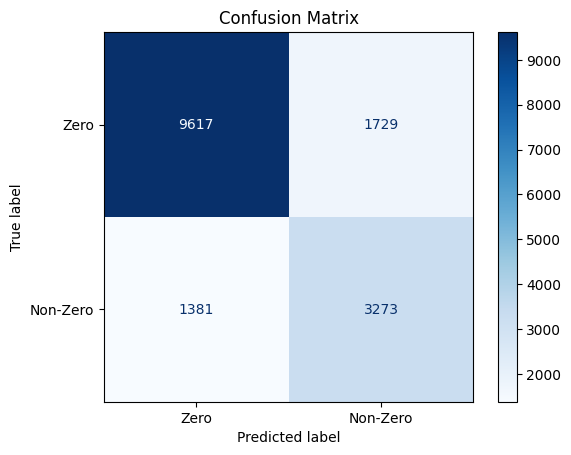

0.3917098523080349

In [41]:
# Adam
classifier_adam = ExpectedCostClassifier().to(device)
adam = torch.optim.Adam(classifier_adam.parameters(), lr=1e-3)
loss_fn = nn.BCELoss()
for _ in range(10):
    train(train_loader, classifier_adam, loss_fn, adam)
print("Adam:\n-------------------------------")
test(validation_loader, classifier_adam, loss_fn)

In [42]:
# SGD
regression_sgd = ExpectedCostRegressor().to(device)
sgd = torch.optim.SGD(regression_sgd.parameters(), lr=1e-3)
loss_fn = nn.MSELoss()

for _ in range(10):
    train(nz_train_loader, regression_sgd, loss_fn, sgd, regression=True)
print("SGD:\n-------------------------------")
test(nz_validation_loader, regression_sgd, loss_fn, regression=True, variance=np.var(y_nz_validate))

SGD:
-------------------------------
Avg loss: 535.893669
R^2 Score: 0.043228



535.8936686910641

In [43]:
# RMSProp
regression_rms = ExpectedCostRegressor().to(device)
rms = torch.optim.RMSprop(regression_rms.parameters(), lr=1e-3)
loss_fn = nn.MSELoss()

for _ in range(10):
    train(nz_train_loader, regression_rms, loss_fn, rms, regression=True)
print("RMSProp:\n-------------------------------")
test(nz_validation_loader, regression_rms, loss_fn, regression=True, variance=np.var(y_nz_validate))

RMSProp:
-------------------------------
Avg loss: 550.654617
R^2 Score: 0.016874



550.6546173095703

In [44]:
# Adam
regression_adam = ExpectedCostRegressor().to(device)
adam = torch.optim.Adam(regression_adam.parameters(), lr=1e-3)
loss_fn = nn.MSELoss()

for _ in range(10):
    train(nz_train_loader, regression_adam, loss_fn, adam, regression=True)
print("SGD:\n-------------------------------")
test(nz_validation_loader, regression_adam, loss_fn, regression=True, variance=np.var(y_nz_validate))

SGD:
-------------------------------
Avg loss: 548.933435
R^2 Score: 0.019947



548.9334351363456

=> Seems like Adam is the appropriate choice for the optimizer of the classifier and SGD for the one of the regression model

2. Trying out different learning rates

Learning rate 0.0001:
-------------------------------
Accuracy: 0.7788125


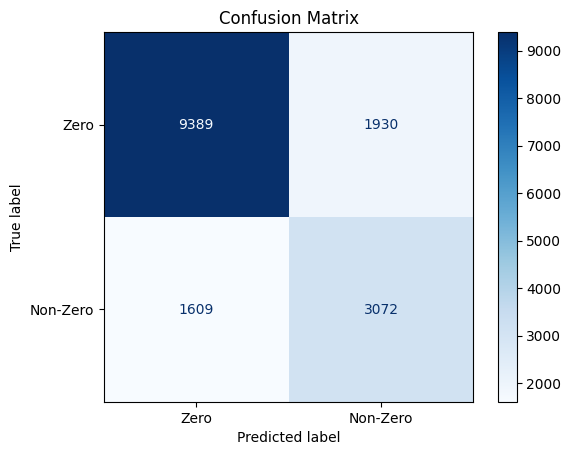

Learning rate 0.001:
-------------------------------
Accuracy: 0.8085625


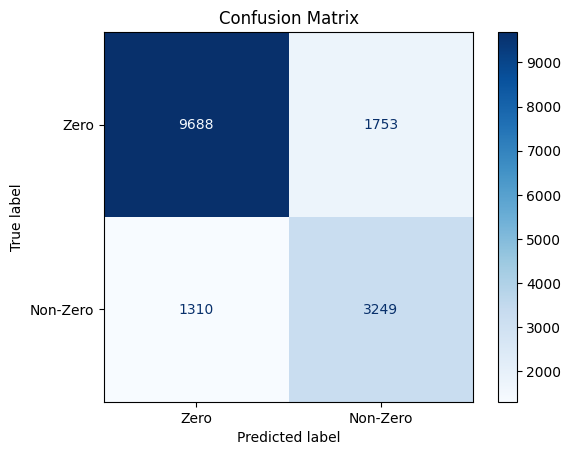

Learning rate 0.003:
-------------------------------
Accuracy: 0.809125


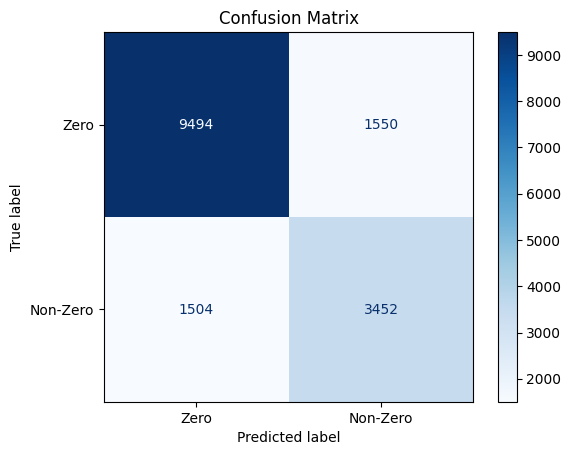

Learning rate 0.01:
-------------------------------
Accuracy: 0.8038125


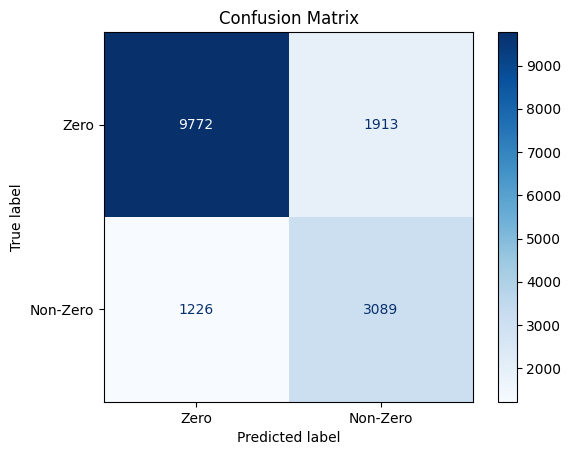

In [28]:
learning_rates = [1e-4, 1e-3, 3e-3, 1e-2]
loss_fn = torch.nn.BCELoss()
for lr in learning_rates:
    classifier_lr = ExpectedCostClassifier().to(device)
    adam = torch.optim.Adam(classifier_lr.parameters(), lr=lr)
    for _ in range(10):
        train(train_loader, classifier_lr, loss_fn, adam)
    print(f"Learning rate {lr}:\n-------------------------------")
    test(validation_loader, classifier_lr, loss_fn)

In [45]:
learning_rates = [1e-4, 1e-3, 3e-3, 1e-2]
loss_fn = torch.nn.MSELoss()
for lr in learning_rates:
    regressor_lr = ExpectedCostRegressor().to(device)
    sgd = torch.optim.SGD(regressor_lr.parameters(), lr=lr)
    for _ in range(10):
        train(nz_train_loader, regressor_lr, loss_fn, sgd, True)
    print(f"Learning rate {lr}:\n-------------------------------")
    test(nz_validation_loader, regressor_lr, loss_fn, True, np.var(y_nz_validate))

Learning rate 0.0001:
-------------------------------
Avg loss: 555.354943
R^2 Score: 0.008482

Learning rate 0.001:
-------------------------------
Avg loss: 553.008869
R^2 Score: 0.012671

Learning rate 0.003:
-------------------------------
Avg loss: 528.719237
R^2 Score: 0.056037

Learning rate 0.01:
-------------------------------
Avg loss: 527.878956
R^2 Score: 0.057537



=> Best learning rates seem to be 3e-3 for both models, but i will try 1e-3 for the regression model as well

3. Determining a good model design

In [47]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class ModularExpectedCostModel(nn.Module):
    def __init__(self, hidden_layers, isClassifier=False):
        super(ModularExpectedCostModel, self).__init__()
        if isClassifier:
            hidden_layers.append(nn.Sigmoid())
        else:
            hidden_layers.append(nn.ReLU())
        self.layers = hidden_layers
        
    
    def forward(self, x):
        return self.layers(x)

In [51]:
def train_and_eval(amount, size, epochs=10, isClassifier=False):
    layers = [nn.Linear(57, size), nn.ReLU()]
    for _ in range(amount):
        layers.append(nn.Linear(size, size))
        layers.append(nn.ReLU())
    layers.append(nn.Linear(size,1))
    model = ModularExpectedCostModel(nn.Sequential(*layers), isClassifier).to(device)
    if isClassifier:
        optim = torch.optim.Adam(model.parameters(), lr=3e-3)
        for _ in range(epochs):
            train(train_loader, model, loss_fn, optim)
        print(f"{amount} * {size}:\n-------------------------------")
        test(test_loader, model, loss_fn)
    else:
        optim = torch.optim.SGD(model.parameters(), lr=1e-2)
        for _ in range(epochs):
            train(nz_train_loader, model, loss_fn, optim, True)
        print(f"{amount} * {size}:\n-------------------------------")
        test(nz_validation_loader, model, loss_fn, True, np.var(y_nz_validate))

1 * 32:
-------------------------------
Accuracy: 0.8043


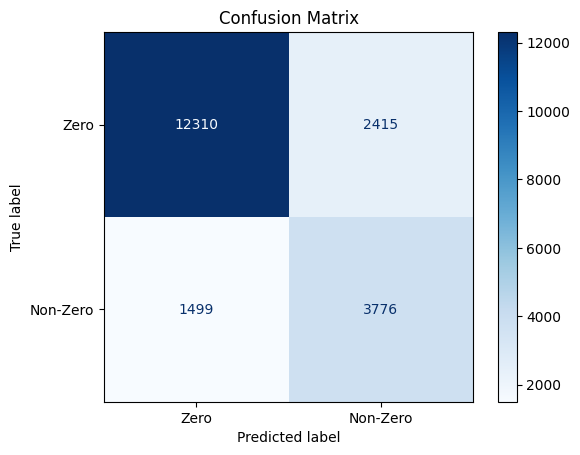

1 * 64:
-------------------------------
Accuracy: 0.8039


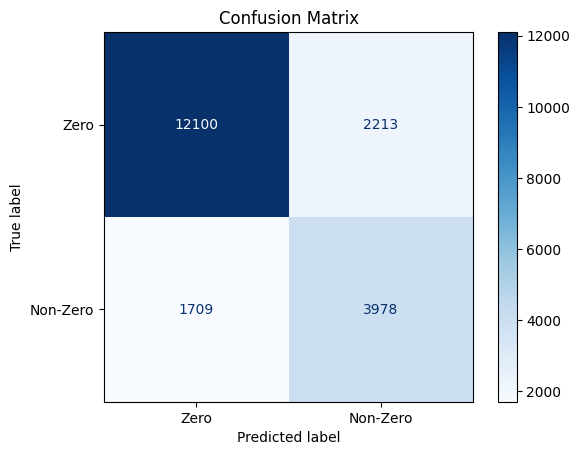

1 * 128:
-------------------------------
Accuracy: 0.80405


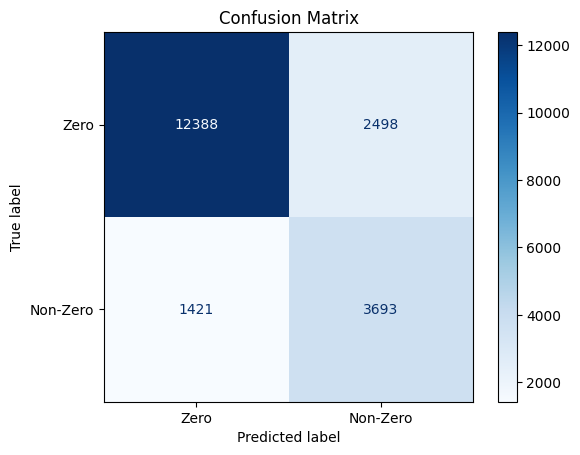

1 * 256:
-------------------------------
Accuracy: 0.8086


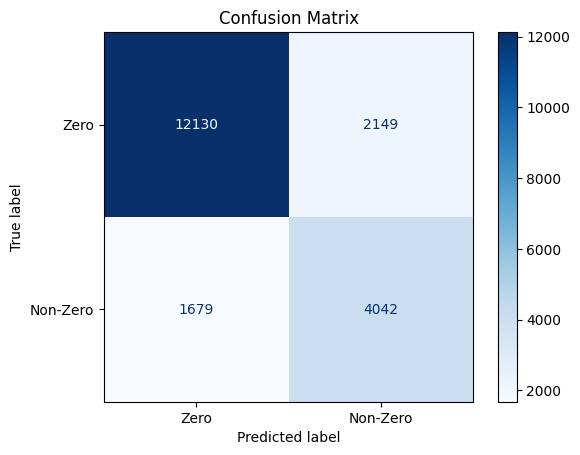

2 * 32:
-------------------------------
Accuracy: 0.8056


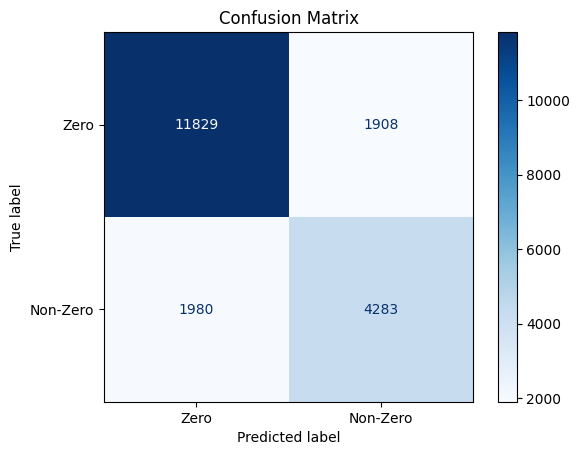

2 * 64:
-------------------------------
Accuracy: 0.8058


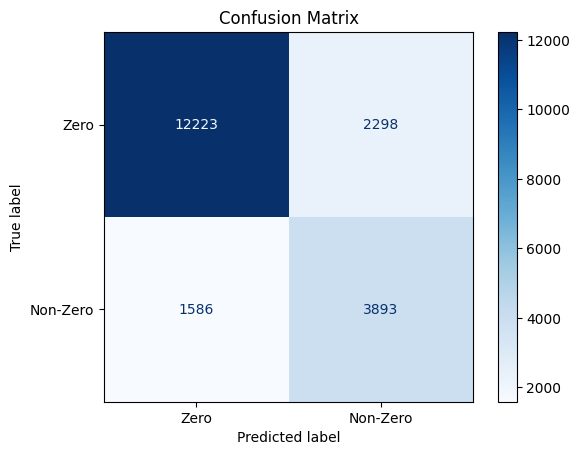

2 * 128:
-------------------------------
Accuracy: 0.8078


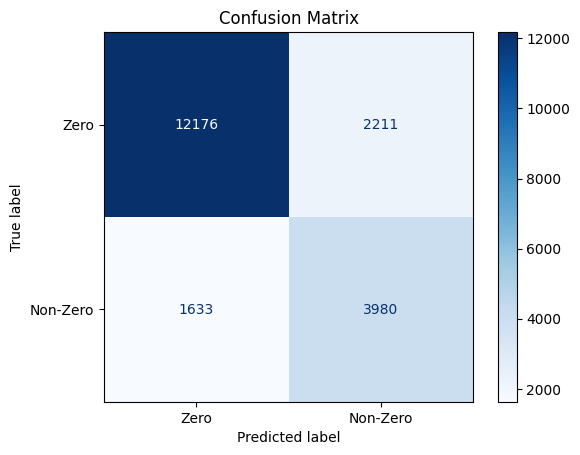

2 * 256:
-------------------------------
Accuracy: 0.8034


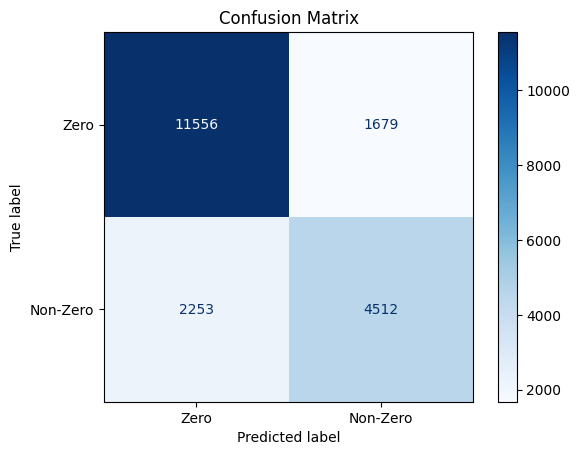

3 * 32:
-------------------------------
Accuracy: 0.80295


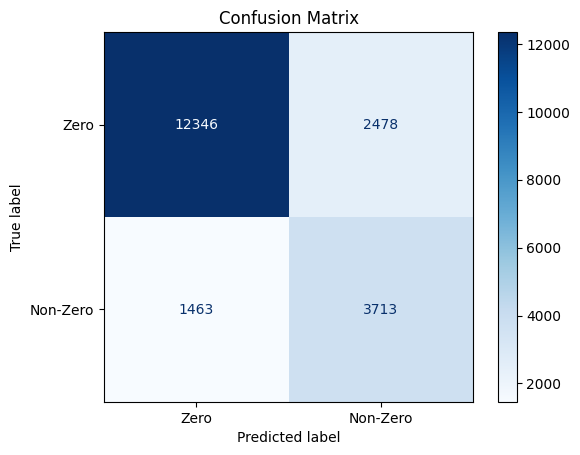

3 * 64:
-------------------------------
Accuracy: 0.8084


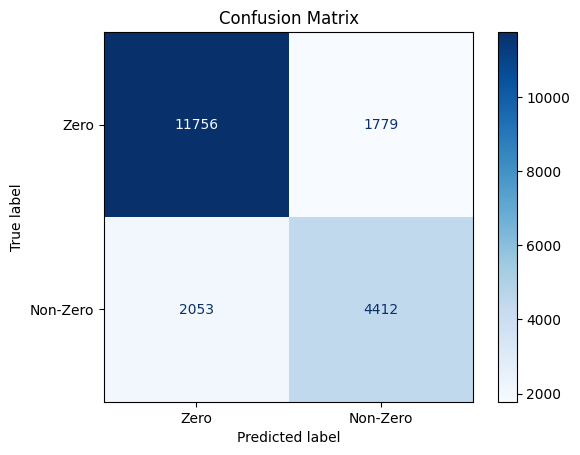

3 * 128:
-------------------------------
Accuracy: 0.8052


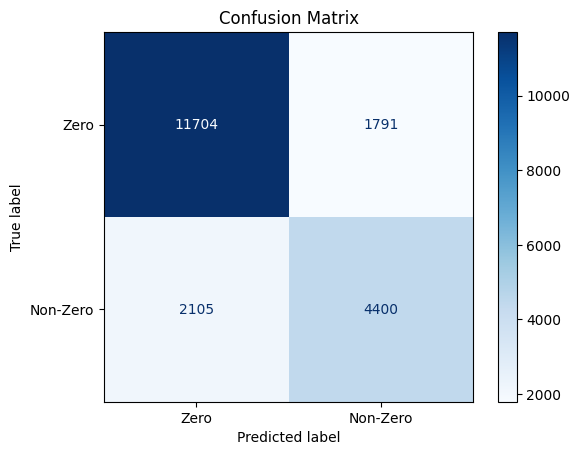

3 * 256:
-------------------------------
Accuracy: 0.80375


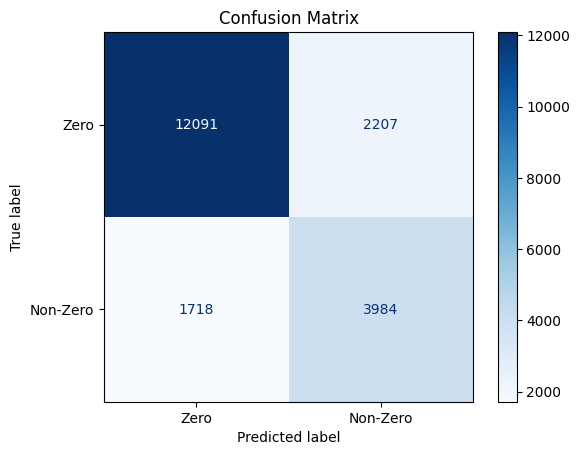

4 * 32:
-------------------------------
Accuracy: 0.80195


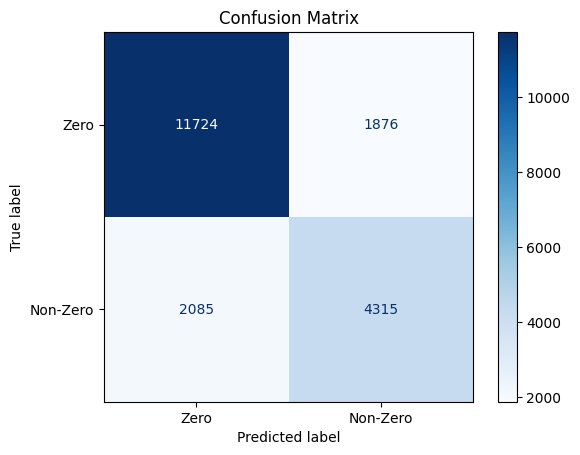

4 * 64:
-------------------------------
Accuracy: 0.7976


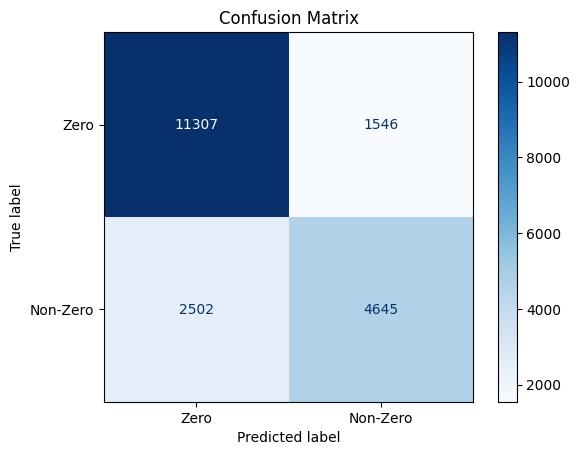

4 * 128:
-------------------------------
Accuracy: 0.81095


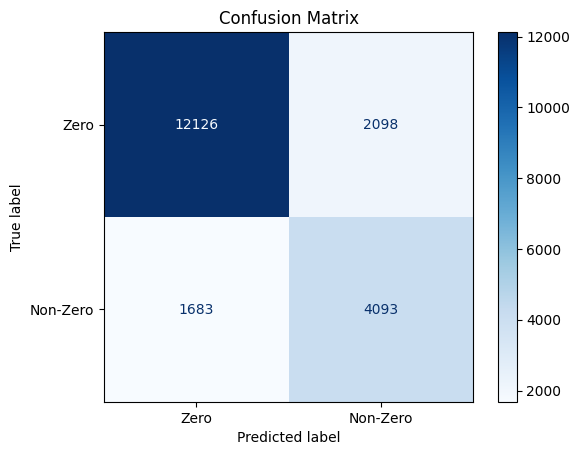

4 * 256:
-------------------------------
Accuracy: 0.808


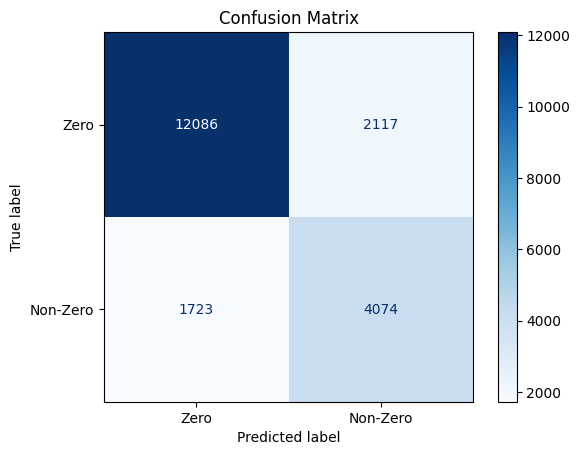

In [ ]:
# Classifier:
hidden_layer_sizes = [32, 64, 128, 256]
hidden_layer_amounts = [1, 2, 3, 4]

for i in hidden_layer_amounts:
    for j in hidden_layer_sizes:
        train_and_eval(i, j, isClassifier=True)
        

=> 4 * 128 performs slightly better than the other architectures over 10 episodes

In [52]:
# Regressor:
hidden_layer_sizes = [32, 64, 128, 256]
hidden_layer_amounts = [1, 2, 3, 4]

for i in hidden_layer_amounts:
    for j in hidden_layer_sizes:
        train_and_eval(i, j, isClassifier=False)

1 * 32:
-------------------------------
Avg loss: 547.839677
R^2 Score: 0.021899

1 * 64:
-------------------------------
Avg loss: 550.352882
R^2 Score: 0.017412

1 * 128:
-------------------------------
Avg loss: 534.884704
R^2 Score: 0.045029

1 * 256:
-------------------------------
Avg loss: 1550.989717
R^2 Score: -1.769102

2 * 32:
-------------------------------
Avg loss: 558.857621
R^2 Score: 0.002228

2 * 64:
-------------------------------
Avg loss: 1550.989717
R^2 Score: -1.769102

2 * 128:
-------------------------------
Avg loss: 1550.989717
R^2 Score: -1.769102



KeyboardInterrupt: 

=> here 1 * 256 performed slightly better than the other models over 10 episodes

4. For the regression model, compare MSE, MAE and Huber loss as loss functions

In [31]:
regressor_mse = ExpectedCostRegressor().to(device)
mse = torch.nn.MSELoss()
regressor_optim = torch.optim.SGD(regressor_mse.parameters(), lr=3e-3)
epochs = 10
for t in range(epochs):
    train(nz_train_loader, regressor_mse, mse, regressor_optim, True)
    print(f"Epoch {t+1}\n-------------------------------")
    test(nz_test_loader, regressor_mse, mse, True, np.var(y_nz_test))
print("Done!")

Epoch 1
-------------------------------
Avg loss: 737.013605
R^2 Score: -0.361832

Epoch 2
-------------------------------
Avg loss: 549.627678
R^2 Score: -0.015586

Epoch 3
-------------------------------
Avg loss: 529.329038
R^2 Score: 0.021921

Epoch 4
-------------------------------
Avg loss: 526.172896
R^2 Score: 0.027753

Epoch 5
-------------------------------
Avg loss: 516.855816
R^2 Score: 0.044969

Epoch 6
-------------------------------
Avg loss: 513.951247
R^2 Score: 0.050336

Epoch 7
-------------------------------
Avg loss: 570.402527
R^2 Score: -0.053973

Epoch 8
-------------------------------
Avg loss: 526.584681
R^2 Score: 0.026992

Epoch 9
-------------------------------
Avg loss: 511.943087
R^2 Score: 0.054046

Epoch 10
-------------------------------
Avg loss: 510.762275
R^2 Score: 0.056228

Done!


In [ ]:
regressor_mae = ExpectedCostRegressor().to(device)
mse = torch.nn.MSELoss()
mae = torch.nn.L1Loss(size_average=None, reduce=None, reduction='mean')
regressor_optim = torch.optim.SGD(regressor_mae.parameters(), lr=3e-3)
epochs = 10
for t in range(epochs):
    train(nz_train_loader, regressor_mae, mae, regressor_optim, True)
    print(f"Epoch {t+1}\n-------------------------------")
    test(nz_validation_loader, regressor_mae, mse, True, np.var(y_nz_validate))
print("Done!")

Epoch 1
-------------------------------
Avg loss: 604.671038
R^2 Score: -0.079566

Epoch 2
-------------------------------
Avg loss: 592.171702
R^2 Score: -0.057250

Epoch 3
-------------------------------
Avg loss: 598.362618
R^2 Score: -0.068303

Epoch 4
-------------------------------
Avg loss: 602.986753
R^2 Score: -0.076559

Epoch 5
-------------------------------
Avg loss: 600.542972
R^2 Score: -0.072196

Epoch 6
-------------------------------
Avg loss: 591.889475
R^2 Score: -0.056746

Epoch 7
-------------------------------
Avg loss: 590.723817
R^2 Score: -0.054665

Epoch 8
-------------------------------
Avg loss: 594.131006
R^2 Score: -0.060748

Epoch 9
-------------------------------
Avg loss: 595.092526
R^2 Score: -0.062465

Epoch 10
-------------------------------
Avg loss: 594.503584
R^2 Score: -0.061413

Done!


In [33]:
regressor_huber = ExpectedCostRegressor().to(device)
mse = torch.nn.MSELoss()
huber = torch.nn.HuberLoss(reduction='mean', delta=1.0)
regressor_optim = torch.optim.SGD(regressor_huber.parameters(), lr=3e-3)
epochs = 10
for t in range(epochs):
    train(nz_train_loader, regressor_huber, huber, regressor_optim, True)
    print(f"Epoch {t+1}\n-------------------------------")
    test(nz_validation_loader, regressor_huber, mse, True, np.var(y_nz_validate))
print("Done!")

Epoch 1
-------------------------------
Avg loss: 602.250864
R^2 Score: -0.075245

Epoch 2
-------------------------------
Avg loss: 594.130272
R^2 Score: -0.060747

Epoch 3
-------------------------------
Avg loss: 597.648626
R^2 Score: -0.067028

Epoch 4
-------------------------------
Avg loss: 592.439333
R^2 Score: -0.057728

Epoch 5
-------------------------------
Avg loss: 598.810561
R^2 Score: -0.069103

Epoch 6
-------------------------------
Avg loss: 590.514322
R^2 Score: -0.054291

Epoch 7
-------------------------------
Avg loss: 593.265996
R^2 Score: -0.059204

Epoch 8
-------------------------------
Avg loss: 595.008879
R^2 Score: -0.062315

Epoch 9
-------------------------------
Avg loss: 592.024552
R^2 Score: -0.056987

Epoch 10
-------------------------------
Avg loss: 594.424070
R^2 Score: -0.061271

Done!


# Train models with the best parameters for more episodes to determine a good stopping point

In [ ]:
class ExpectedCostRegressor(nn.Module):
    def __init__(self):
        super(ExpectedCostRegressor, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(57, 256),
            nn.ReLU(),
            nn.Linear(256, 256),
            nn.ReLU(),
            nn.Linear(256,1),
        )

    def forward(self, x):
        return self.fc(x)

class ExpectedCostClassifier(nn.Module):
    def __init__(self):
        super(ExpectedCostClassifier, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(57, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128,1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.fc(x)

In [ ]:
optimized_classifier = ExpectedCostClassifier().to(device)
print(optimized_classifier)
classifier_lossfn = torch.nn.BCELoss()
classifier_optim = torch.optim.Adam(optimized_classifier.parameters(), lr=3e-3)

ExpectedCostClassifier(
  (fc): Sequential(
    (0): Linear(in_features=57, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=128, bias=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=128, bias=True)
    (7): ReLU()
    (8): Linear(in_features=128, out_features=128, bias=True)
    (9): ReLU()
    (10): Linear(in_features=128, out_features=1, bias=True)
    (11): Sigmoid()
  )
)


Epoch 1
-------------------------------
Accuracy: 0.7912


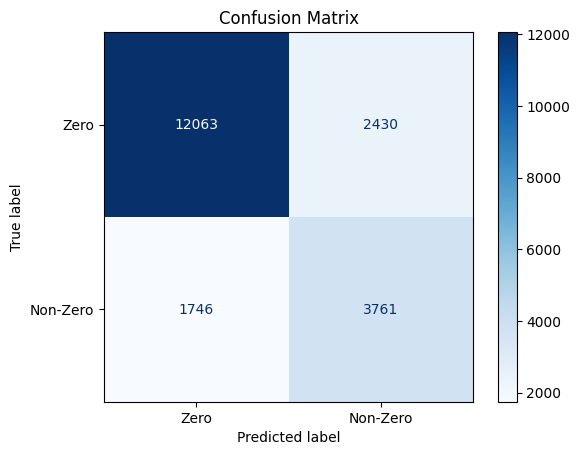

Epoch 10
-------------------------------
Accuracy: 0.80895


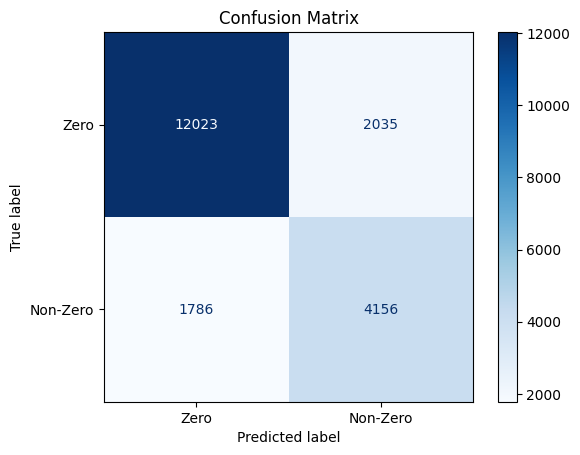

Epoch 20
-------------------------------
Accuracy: 0.81025


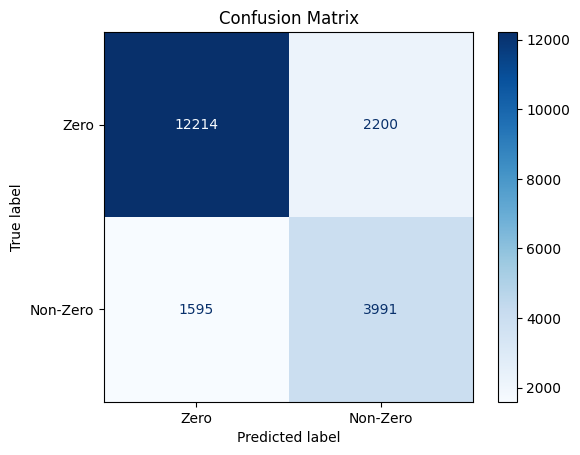

Epoch 30
-------------------------------
Accuracy: 0.8056


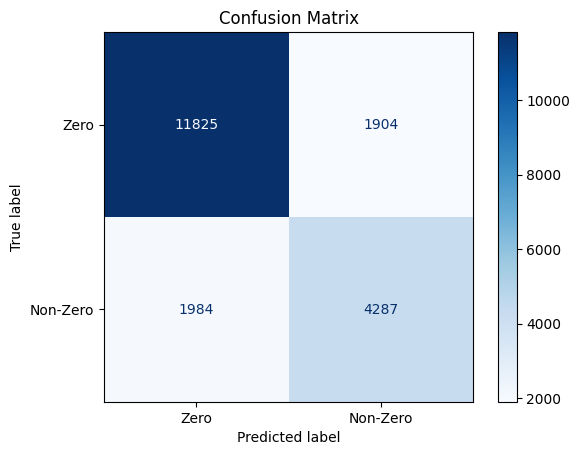

Epoch 40
-------------------------------
Accuracy: 0.79745


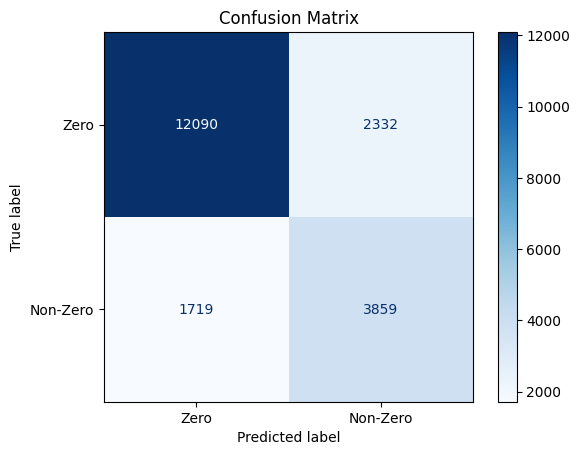

Epoch 50
-------------------------------
Accuracy: 0.80195


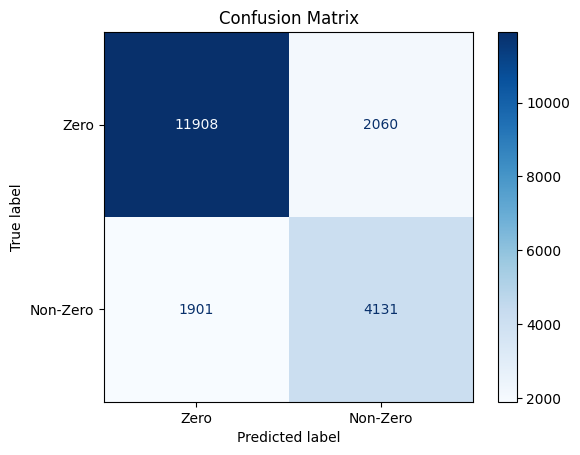

Done!


In [65]:
epochs = 50
for t in range(epochs):
    train(train_loader, optimized_classifier, classifier_lossfn, classifier_optim)
    if (t+1) % 10 == 0 or t == 0:
        print(f"Epoch {t+1}\n-------------------------------")
        test(test_loader, optimized_classifier, classifier_lossfn)
print("Done!")

=> after 20 episodes the model starts overfitting

=> Looks like training the classifier for around 20 epochs is optimal as it starts to overfit afterwards

In [ ]:
optimized_regressor = ExpectedCostRegressor().to(device)
print(optimized_regressor)
regressor_lossfn = torch.nn.MSELoss()
regressor_optim = torch.optim.SGD(optimized_regressor.parameters(), lr=3e-3)

ExpectedCostRegressor(
  (fc): Sequential(
    (0): Linear(in_features=57, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=1, bias=True)
  )
)


In [70]:
epochs = 50
for t in range(epochs):
    train(nz_train_loader, optimized_regressor, regressor_lossfn, regressor_optim, True)
    print(f"Epoch {t+1}\n-------------------------------")
    test(nz_test_loader, optimized_regressor, regressor_lossfn, True, np.var(y_nz_test))
print("Done!")

Epoch 1
-------------------------------
Avg loss: 566.997857
R^2 Score: -0.047682

Epoch 2
-------------------------------
Avg loss: 514.977231
R^2 Score: 0.048440

Epoch 3
-------------------------------
Avg loss: 515.125033
R^2 Score: 0.048167

Epoch 4
-------------------------------
Avg loss: 510.758407
R^2 Score: 0.056235

Epoch 5
-------------------------------
Avg loss: 513.527183
R^2 Score: 0.051119

Epoch 6
-------------------------------
Avg loss: 584.031112
R^2 Score: -0.079156

Epoch 7
-------------------------------
Avg loss: 536.394997
R^2 Score: 0.008865

Epoch 8
-------------------------------
Avg loss: 537.051433
R^2 Score: 0.007652

Epoch 9
-------------------------------
Avg loss: 510.155297
R^2 Score: 0.057350

Epoch 10
-------------------------------
Avg loss: 542.385625
R^2 Score: -0.002205

Epoch 11
-------------------------------
Avg loss: 522.807181
R^2 Score: 0.033972

Epoch 12
-------------------------------
Avg loss: 521.067292
R^2 Score: 0.037187

Epoch 13
-

=> performance of the regression model is still really bad. Maybe it should be omitted in favor of just predicting whether cost will be non zero

# Lastly, train the models for the appropriate amount of epochs and save them

ExpectedCostClassifier(
  (fc): Sequential(
    (0): Linear(in_features=57, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=128, bias=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=128, bias=True)
    (7): ReLU()
    (8): Linear(in_features=128, out_features=128, bias=True)
    (9): ReLU()
    (10): Linear(in_features=128, out_features=1, bias=True)
    (11): Sigmoid()
  )
)
Accuracy: 0.8047


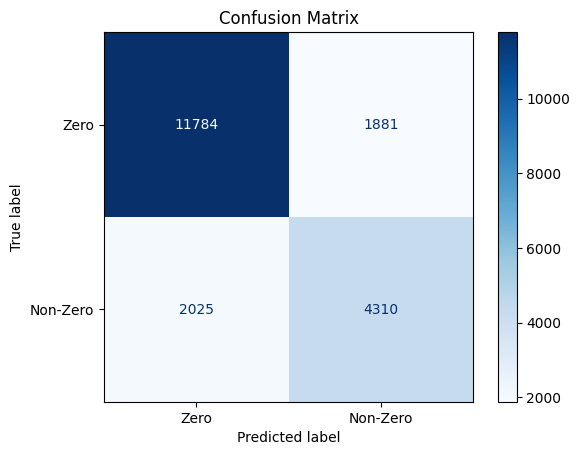

Done!


In [28]:
# train the classifier for 20 episodes and save it
optimized_classifier = ExpectedCostClassifier().to(device)
print(optimized_classifier)
classifier_lossfn = torch.nn.BCELoss()
classifier_optim = torch.optim.Adam(optimized_classifier.parameters(), lr=3e-3)
epochs = 50
for t in range(epochs):
    train(train_loader, optimized_classifier, classifier_lossfn, classifier_optim)
test(test_loader, optimized_classifier, classifier_lossfn)
print("Done!")  
torch.save(optimized_classifier, "classifier.pt")

In [36]:
optimized_regressor = ExpectedCostRegressor().to(device)
print(optimized_regressor)
regressor_lossfn = torch.nn.MSELoss()
regressor_optim = torch.optim.SGD(optimized_regressor.parameters(), lr=3e-3)
epochs = 17
for t in range(epochs):
    train(nz_train_loader, optimized_regressor, regressor_lossfn, regressor_optim, True)
    print(f"Epoch {t+1}\n-------------------------------")
    test(nz_test_loader, optimized_regressor, regressor_lossfn, True, np.var(y_nz_test))
print("Done!")
torch.save(optimized_regressor, "regressor.pt")

ExpectedCostRegressor(
  (fc): Sequential(
    (0): Linear(in_features=57, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=1, bias=True)
  )
)
Epoch 1
-------------------------------
Avg loss: 531.166679
R^2 Score: 0.018526

Epoch 2
-------------------------------
Avg loss: 520.437739
R^2 Score: 0.038350

Epoch 3
-------------------------------
Avg loss: 514.528196
R^2 Score: 0.049270

Epoch 4
-------------------------------
Avg loss: 520.808359
R^2 Score: 0.037665

Epoch 5
-------------------------------
Avg loss: 520.896793
R^2 Score: 0.037502

Epoch 6
-------------------------------
Avg loss: 511.615291
R^2 Score: 0.054652

Epoch 7
-------------------------------
Avg loss: 514.390766
R^2 Score: 0.049524

Epoch 8
-------------------------------
Avg loss: 509.473175
R^2 Score: 0.058610

Epoch 9
-------------------------------
Avg loss: 525.089726
R^2 Score: 0.029754